In [7]:
import matplotlib.pyplot as plt
import pandas as pd

def read_and_process_data(filename):
    data = {'Size': [], 'Value': []}
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith('Run'):
                try:
                    # Attempt to extract and split the next line which should contain the data
                    next_line = next(file)  # This reads the line after 'Run...'
                    parts = next_line.strip().split(',')
                    size = int(parts[0])
                    value = float(parts[1])
                    data['Size'].append(size)
                    data['Value'].append(value)
                except (IndexError, ValueError) as e:
                    print(f"Error processing line: {next_line}\nError: {e}")
    return pd.DataFrame(data)

def plot_data(df):
    # Calculate mean and standard deviation for each size
    summary = df.groupby('Size').agg(['mean', 'std'])
    summary.columns = ['Mean', 'STD']  # Flatten the MultiIndex for easier plotting

    # Plotting
    fig, ax = plt.subplots()
    summary['Mean'].plot(kind='bar', yerr=summary['STD'], ax=ax, capsize=4, color='skyblue', error_kw=dict(ecolor='black', lw=1))
    plt.title('Performance by Size with Error Bars')
    plt.xlabel('Size')
    plt.ylabel('Mean Value')
    plt.xticks(rotation=0)  # Keep the x labels readable
    plt.grid(True, linestyle='--')
    plt.tight_layout()
    plt.show()


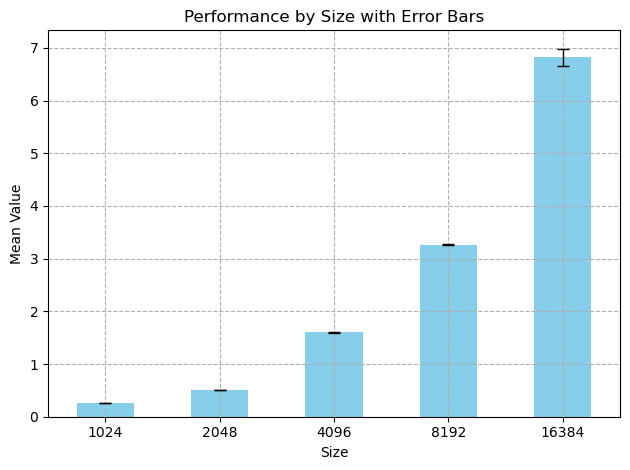

In [8]:
filename = 'exercise2_benchmark_101701.out'  # Update with the actual file path
df = read_and_process_data(filename)
plot_data(df)

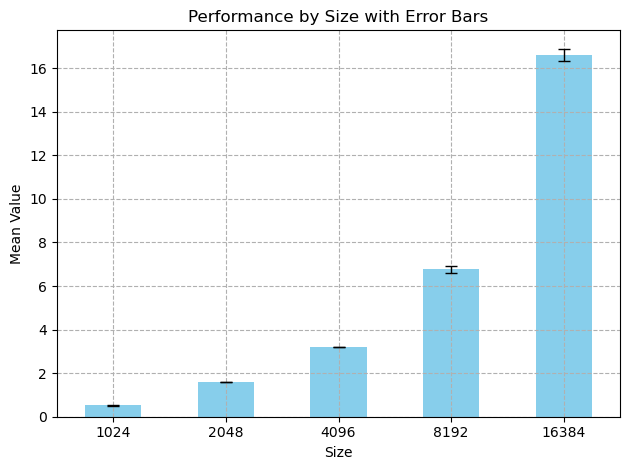

In [9]:
filename = 'exercise2_benchmark_101703.out'  # Update with the actual file path
df = read_and_process_data(filename)
plot_data(df)